# **Business Understanding :**

**Business Goal :**  Creating a Predictive Model for Predciting potability of the water.

**Client Ref :** Government or Regulatory Bodies such as the World Health Organization (WHO) or Environmental Protection Agency (EPA), which publish guidelines and data on water quality standards and can be useful for developing predictive models for water potability.

**source :** The dataset used in this study, 'Water Potability' was obtained from Kaggle



*   **Loading data**




In [22]:
# python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('/content/water_potability.csv')

In [24]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0




*   **Basic Data Examination**




In [25]:
data.shape

(3276, 10)

In [26]:
# columns of the data set
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [27]:
# non null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [28]:
# missing values count
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0




1.   **Data Validation and cleaning**






*   **checking for duplicated rows**




In [29]:
dup_rows = data[data.duplicated()]
print(dup_rows)


Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


* **validation of each column**

In [30]:
for c in data.columns:
  print(f'{c} : {data[c].nunique()}')

ph : 2785
Hardness : 3276
Solids : 3276
Chloramines : 3276
Sulfate : 2495
Conductivity : 3276
Organic_carbon : 3276
Trihalomethanes : 3114
Turbidity : 3276
Potability : 2


**2.EDA(Understanding the data)**

In [31]:
data_c = data.copy()

In [32]:
data_c.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


##### **2.1 Univariate analysis**

In [33]:
# descriptive
data_c.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [34]:
# visualisation - histogram of each column
import plotly.express as px
for c in data_c.columns:
  fig=px.histogram(data_c,x=c,nbins=50)
  fig.show()


In [35]:
data_c['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


**Insights**


*   **ph :** The average ph value is 7.080795 which is neutral.Water containing neutral ph value is safe for consumption.Most of the water samples are having neutral ph value.only 25% of the water samples are highly alkaline.
*   **Hardness :** The mean of the hardness is 196.369496,which means on an average water samples belong to hard level.when we observe min and max which are 47.432 and 323.124 respectively shows that water samples' hardeness are ranging from moderate to very hard levels.
*   **Solids :** Most of the samples are having solids more than 15000mg/L.It means either rich in minerals or badly contaminated.
*   **Conductivity :** most of the water samples(75%) have conductivity less than 500mS/cm which tells most of them fall under less conductivity.

*   **Turbidity :** min is 1NTU and max is 6NTU.But 75% of the water samples are having less than 5NTU which are low turbide and appearing clear and safe for drinking.only 25% of the water samples are having slightly moderate turbidity value i.e 6.73NTU.
*   **Potability :** 1 represents potable water.0 represents non-Potable water.In the dataset,only 1,278 out of 3,276 samples are potable(39.02%).Remaining 1,998 samples are not suitable for human consumption(60.98%).







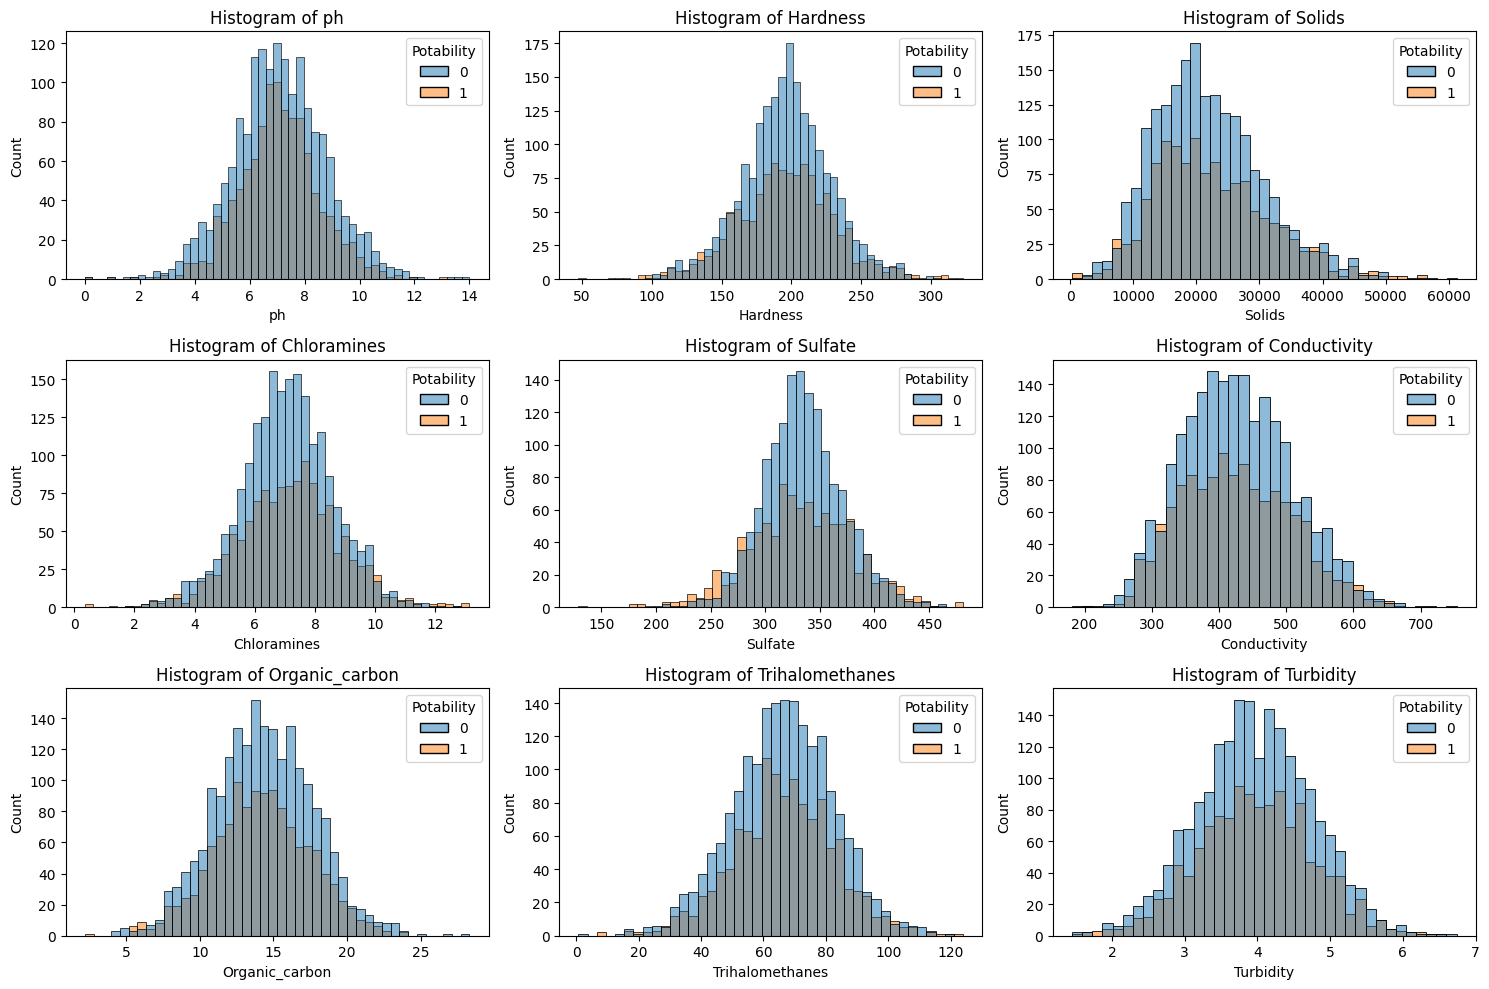

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, feature in enumerate(data.columns[:-1]):  # Exclude 'Potability' column
    sns.histplot(data=data, x=feature, hue='Potability', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()




**2.2 Bivariate analysis**

**Distribution of Features**

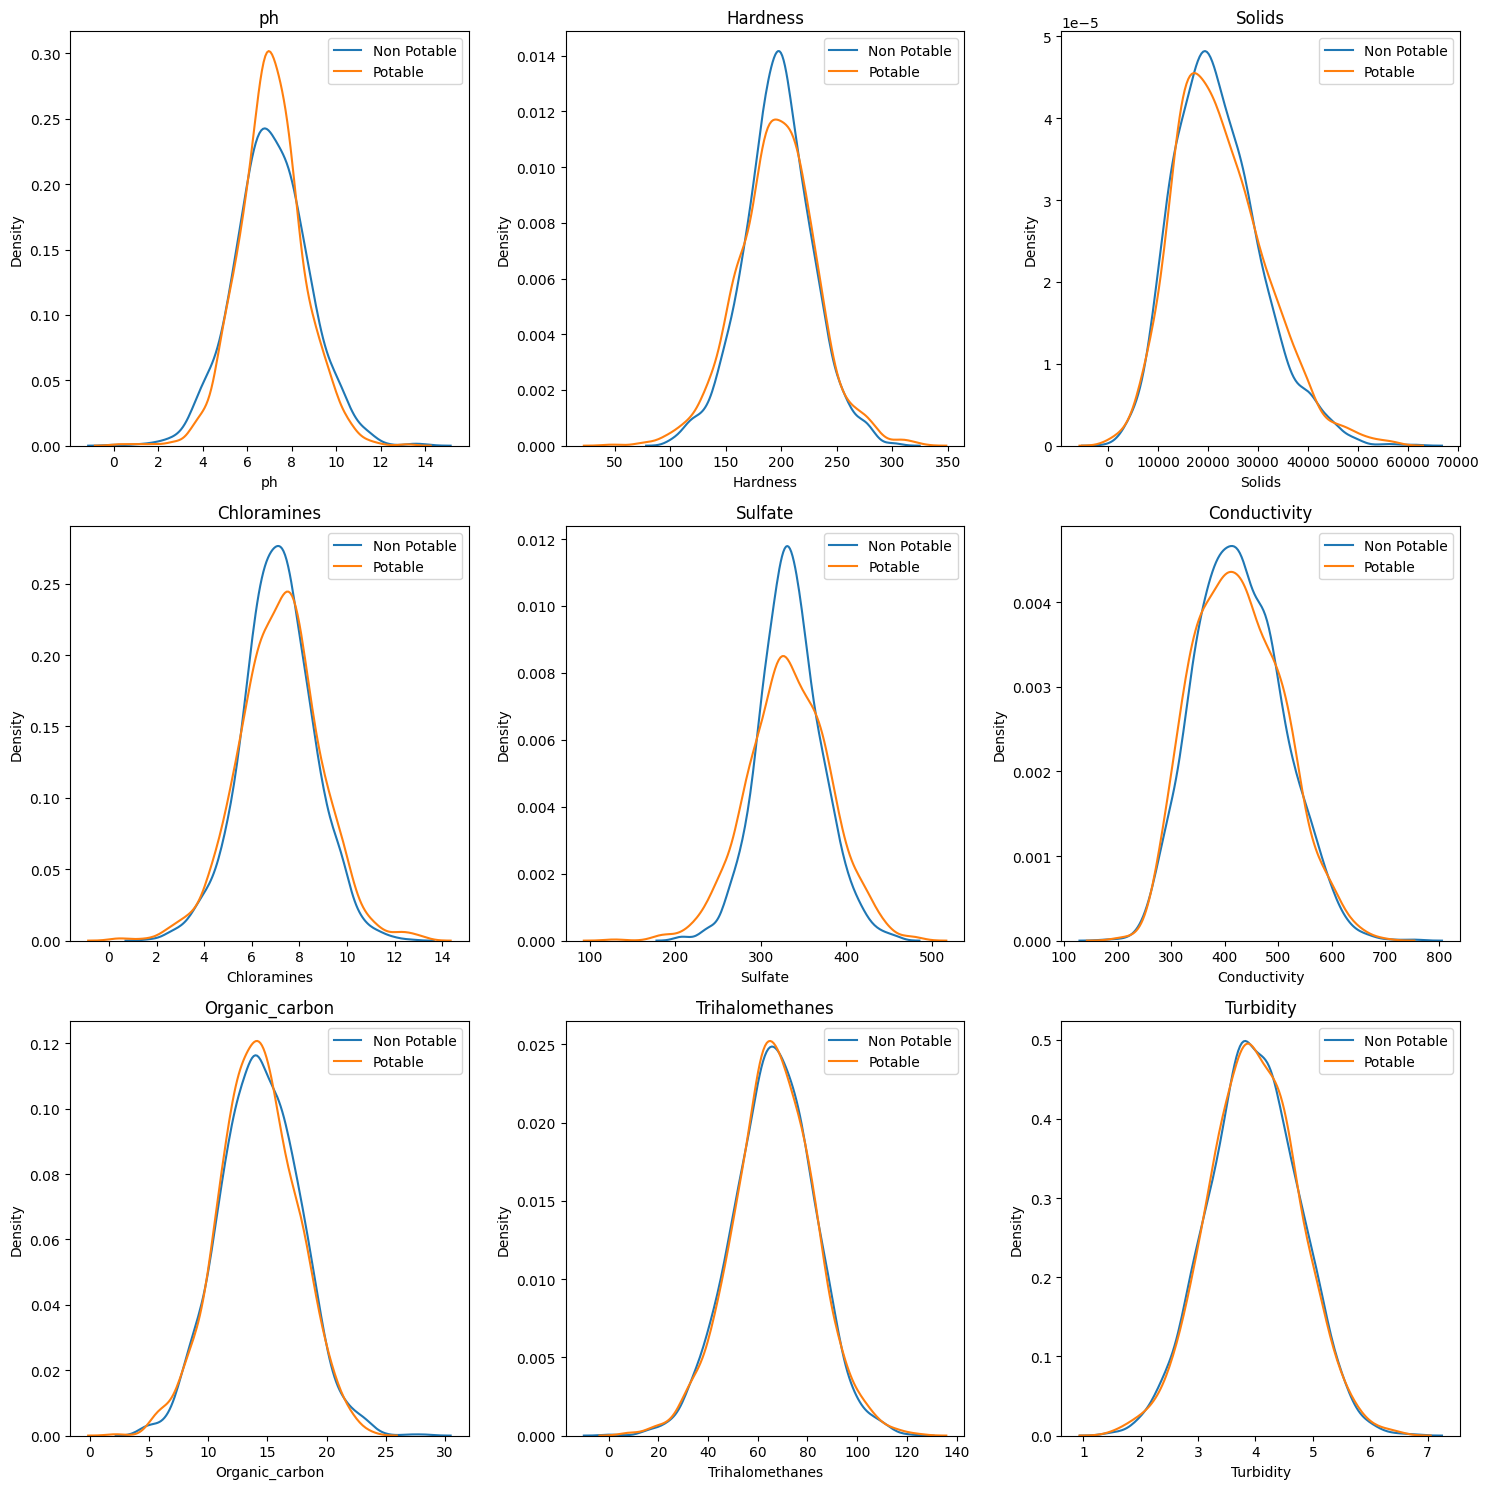

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

**Insights**



*   *Negative correlation* : Features 'ph', 'hardness', 'sulfate', 'conductivity', 'organic_carbon' with 'potability' are having negative correlation.This tells that these features don't affect the water potability directly.

*   *Positive correlation* : Features 'solids', 'chloramines', 'trihalomethanes', 'turbidity' are having weak positive correlation with 'potability'.This tells that these features are having negligible affect on potability of water.




**3.Missing values and outliers handling**

In [38]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Insights**


* The columns which are having null values are numerical columns.We can fill them with mean or median values.

* 'ph' : The values are uniformly distributed around a neutral pH (around 7).so mean works well here.


* 'sulfate' : The values are not distributed uniformly. so median works well here.

* 'Trihalomethanes' : The values are not distributed uniformly. so median works well here.










In [39]:
data['ph'].fillna(data['ph'].mean(),inplace=True)
data['Sulfate'].fillna(data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].median(),inplace=True)

In [40]:
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [41]:
# Identifying outliers by using IQR
for d in data.columns:
  Q1 = data[d].quantile(0.25)
  Q3 = data[d].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[d] < lower_bound) | (data[d] > upper_bound)][[d]]
  if not outliers.empty:
        print(d)



ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


visualization of outliers before handling null values


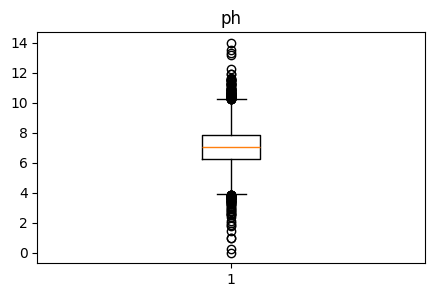

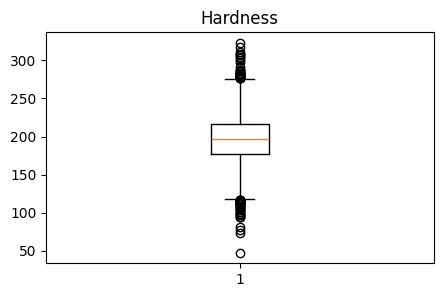

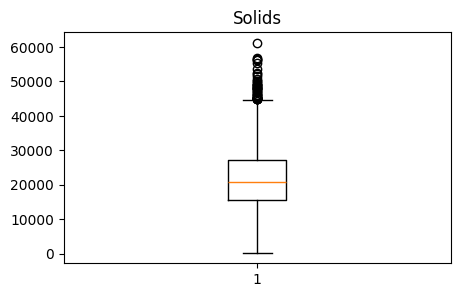

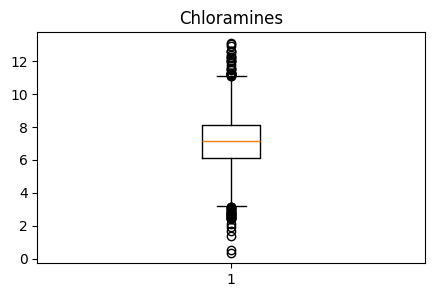

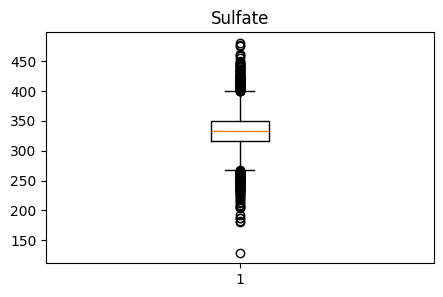

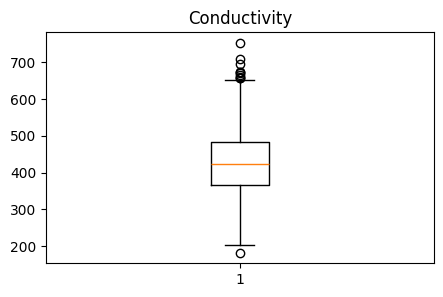

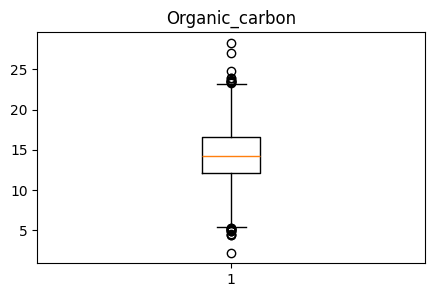

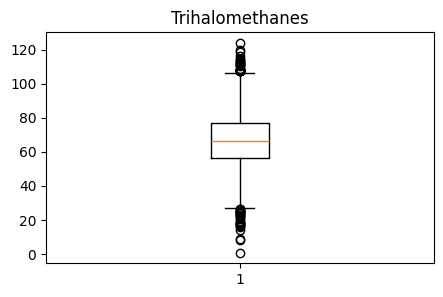

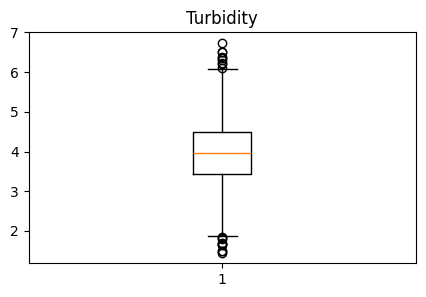

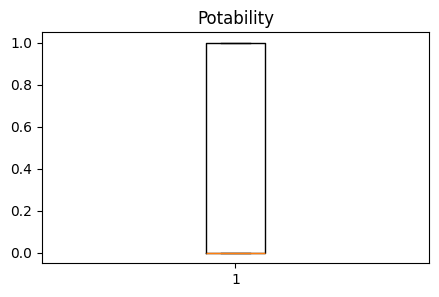

In [42]:
# visualization of outliers before handling null values
print('visualization of outliers before handling null values')
for d in data.columns:
  plt.figure(figsize=(5,3))
  plt.boxplot(data[d])
  plt.title(d)
  plt.show()

In [43]:
for d in data.columns:
    lower_percentile = data[d].quantile(0.05)
    upper_percentile = data[d].quantile(0.95)
    outliers_lower = data[d] < lower_percentile
    outliers_upper = data[d] > upper_percentile
    data[d] = data[d].clip(lower=lower_percentile, upper=upper_percentile)

visualization of outliers after handling null values


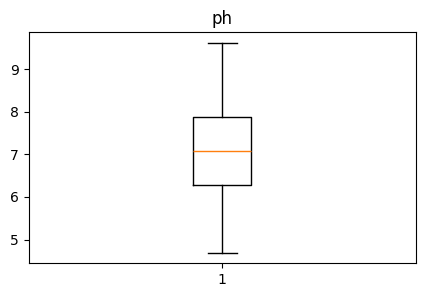

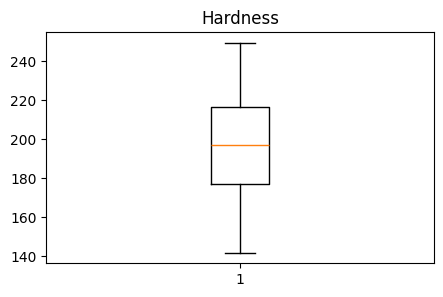

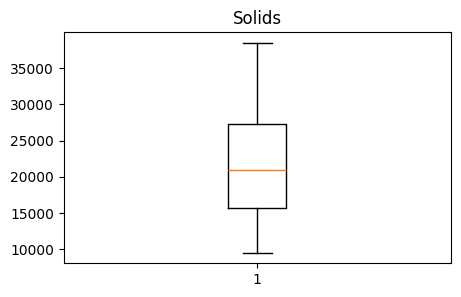

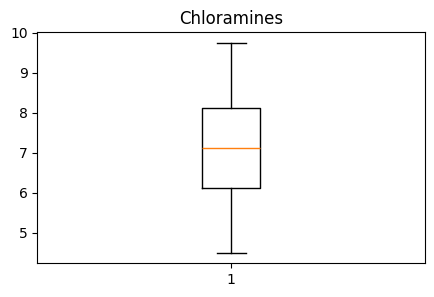

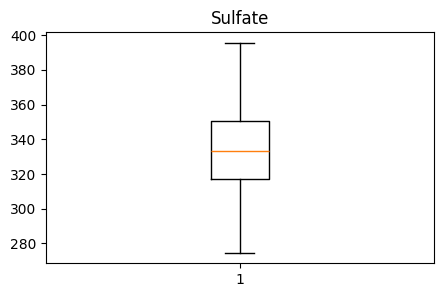

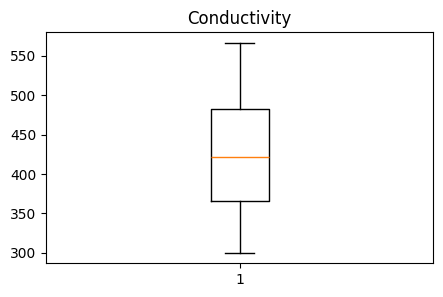

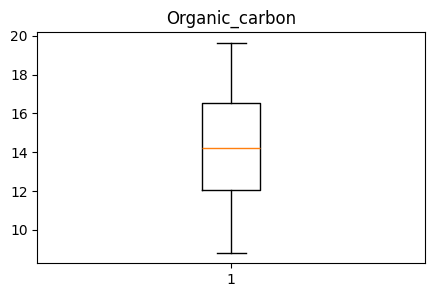

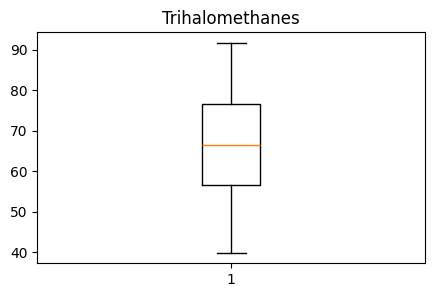

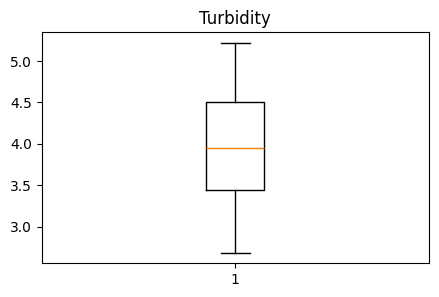

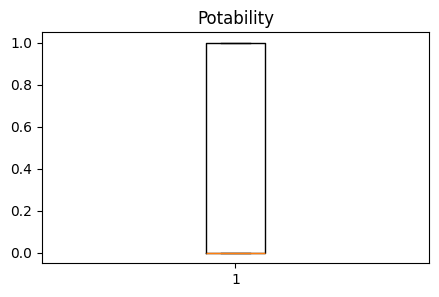

In [44]:
# visualization of outliers after handling null values
print('visualization of outliers after handling null values')
for d in data.columns:
  plt.figure(figsize=(5,3))
  plt.boxplot(data[d])
  plt.title(d)
  plt.show()

**4.Predictive modeling**



**4.1 Selecting X and y**


*   Selecting Output column (y) - future prediction column & Input column/columns (X) - Reference columns

  *  X (independent variables/input columns/explanatory variables)
  *  y (dependent variable/output column/response column





In [45]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,4.688853,141.763281,18630.057858,6.635246,333.073546,566.349320,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,91.744595,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,39.906235,4.075075,0


* Here, the feature 'Potability' is considered as dependent column(target variable) - y
* Remaining columns are independent columns - X

In [46]:
# input and output variables
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [47]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,4.688853,141.763281,18630.057858,6.635246,333.073546,566.349320,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,91.744595,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,39.906235,4.075075


In [48]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


**4.2 Feature Engineering**

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X.iloc[:,[1,2,4,5,7]] = sc.fit_transform(X.iloc[:,[1,2,4,5,7]])

In [50]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,4.688853,141.763281,18630.057858,6.635246,333.073546,566.349320,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,91.744595,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,39.906235,4.075075


**4.3 train_test_split of X and y**

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
print(X_train.shape,y_train.shape)

(2620, 9) (2620,)


In [53]:
print(X_test.shape,y_test.shape)

(656, 9) (656,)


**4.4 Algorithm training with train data**
* In Classification we have below algorithms

 * Logistic Regression
 * Knearest Neighbors (KNN)
 * Support Vector Machine (SVM)
 * Naive Bayes (NB)
 * Decision Trees
 * Random Forest (Bagging)
 * Xgboost (Boosting)

In [54]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier


##LogisticRegression
1. penalty='l2'
Purpose: This parameter controls the type of regularization applied to the model.
2. C=1.0
Purpose: This parameter controls the strength of the regularization.
Default: The default value is 1.0.
3.class_weight='balanced'
Purpose: Addresses class imbalance in the dataset.
4. random_state=42
Purpose: Sets the seed for the random number generator.


In [55]:
lr = LogisticRegression(penalty='l2',C=1.0,class_weight='balanced',random_state=42)
lr.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', random_state=42)

* KNeighbors Classifier
1. n_neighbors=5
Purpose: This parameter determines the number of nearest neighbors to consider when predicting the class label for a new data point.
2. p=2
Purpose: This parameter controls the distance metric used to calculate the distance between data points.
p=2: Specifically refers to the Euclidean distance, which is the standard distance metric in Euclidean space.


In [56]:
kn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean', p=2)
kn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

* SVC

In [57]:
sv = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
sv.fit(X_train,y_train)

SVC(probability=True)

* Naive_Bayes
1. var_smoothing=1e-9
Purpose: This parameter addresses potential issues with zero variances in the Gaussian probability density functions estimated for each feature within each class.

In [58]:
nv = GaussianNB(var_smoothing=1e-9)
nv.fit(X_train,y_train)

GaussianNB()

* Decision Tree Classifier
1. criterion='entropy'
Purpose: This parameter defines the function to measure the quality of a split.
'entropy': This specifically refers to the information gain criterion.
How it works: Information gain measures the reduction in uncertainty about the class labels after a split. A higher information gain indicates a better split.
2.max_depth=10
Purpose: This parameter limits the maximum depth of the tree.
Controlling complexity: max_depth helps to control the complexity of the tree and prevent overfitting.
3.random_state=42
Purpose: Sets the seed for the random number generator.

In [59]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
dt.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

* Random Forest Classifier
1. n_estimators=100

Purpose: This parameter determines the number of decision trees in the random forest.
Significance:
Ensemble learning: Random forests are an ensemble method, meaning they combine the predictions of multiple decision trees.
Improved performance:
2. max_depth=10
Purpose: This parameter limits the maximum depth of each individual decision tree within the forest.

In [60]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, random_state=42)

* XGB classifier
1. n_estimators=100

Purpose: This parameter determines the number of boosting rounds (trees) to perform.
Significance:
Boosting: XGBoost is an ensemble method that builds an additive model in a stage-wise fashion,
Improved performance:
2. learning_rate=0.1
Purpose: This parameter controls the step size at each boosting round.
Significance:
Shrinkage: A lower learning rate (e.g., 0.1) shrinks the contribution of each tree, making the model more robust to overfitting.
Convergence: Smaller learning rates often require more trees to converge to an optimal solution.
3. max_depth=6
Purpose: This parameter limits the maximum depth of each individual tree within the boosting ensemble.
Significance:
Overfitting:
Controlling complexity:
4. gamma=0.1

Purpose: This parameter defines the minimum loss reduction required to make a further partition on a leaf node of a tree.
Significance:
Pruning: Higher values of gamma increase the threshold for making a split, effectively pruning the tree and making it more conservative.
Controlling complexity: gamma helps to control the complexity of the tree by preventing unnecessary splits.

In [61]:
xg = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,gamma=0.1,random_state=42)
xg.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

* Metrics
 * accuracy score
 * confusion matrix
 * classification report
 * auc
 * roc_curve

In [62]:
from sklearn.metrics import f1_score

f1_score_train=[]
f1_score_test=[]
for i in [lr,kn,sv,nv,dt,rf,xg]:
  i.fit(X_train,y_train)
  y_pred_train= i.predict(X_train)
  # Use f1_score function instead of the list variable
  f1_score_train.append(f1_score(y_train,y_pred_train))
  y_pred_test= i.predict(X_test)
  # Use f1_score function instead of the list variable
  f1_score_test.append(f1_score(y_test,y_pred_test))
print(f1_score_train)
print(f1_score_test)

[0.45104895104895104, 1.0, 0.0, 0.28257686676427524, 0.6723356009070295, 0.8103448275862069, 0.9382337927514037]
[0.4329159212880143, 0.30049261083743845, 0.0, 0.24761904761904763, 0.4429223744292237, 0.3582089552238806, 0.47381546134663344]


In [63]:
Performance=pd.DataFrame(columns=['Model','Train F1 score','Test F1 score'])
Performance['Model']=['Logistic Regression','Knearest Neighbors','Support Vector Machine','Naive Bayes','Decision Trees','Random Forest','Xgboost']
Performance['Train F1 score']=f1_score_train
Performance['Test F1 score']=f1_score_test
Performance['Difference']=Performance['Train F1 score']-Performance['Test F1 score']
Performance

,Model,Train F1 score,Test F1 score,Difference
0,Logistic Regression,0.451049,0.432916,0.018133
1,Knearest Neighbors,1.000000,0.300493,0.699507
2,Support Vector Machine,0.000000,0.000000,0.000000
3,Naive Bayes,0.282577,0.247619,0.034958
4,Decision Trees,0.672336,0.442922,0.229413
5,Random Forest,0.810345,0.358209,0.452136
6,Xgboost,0.938234,0.473815,0.464418


In [64]:
import warnings
warnings.filterwarnings('ignore')

**Hyper Parameter Tunning**

In [65]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define your models and hyperparameter grids
model_params = {
    "DTC": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 7, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "RF": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "XGB": {
        "model": XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
        "params": {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3],
            'n_estimators': [100, 200, 300],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9]
        }
    }
}


# Perform Randomized Search for each model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = []
for model_name, params in model_params.items(): # Iterate through model_params
    rs = RandomizedSearchCV(params["model"], params["params"], cv=cv, n_iter=10) # Access "model" and "params" from params
    rs.fit(X, y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])

scores

[['DTC',
  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5},
  0.6413344814745858],
 ['RF',
  {'n_estimators': 100,
   'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_depth': 10},
  0.6712469744926457],
 ['XGB',
  {'subsample': 0.9,
   'n_estimators': 100,
   'max_depth': 3,
   'learning_rate': 0.1,
   'colsample_bytree': 0.8},
  0.6625518990876932]]

In [66]:
Performance['Test F1 score'][4:]

,Test F1 score
4,0.442922
5,0.358209
6,0.473815


In [67]:
Hy_par_tunning=pd.DataFrame(columns=['Model','Best Score'])
Hy_par_tunning['Model']=['Decision Trees','Random Forest','Xgboost']
Hy_par_tunning['Best Score']=scores[0][2],scores[1][2],scores[2][2]
Hy_par_tunning

,Model,Best Score
0,Decision Trees,0.641334
1,Random Forest,0.671247
2,Xgboost,0.662552


In [68]:
para= {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
 }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
# The loop isn't necessary here. It was causing the error by trying to access 'estimators_' before fitting.
#for model_name, params in para.items():
rfc = RandomizedSearchCV(para["model"], para["params"], cv=cv, n_iter=10) # Access "model" and "params" from para
rfc.fit(X, y) # Now the model will be fitted, and 'estimators_' will be available

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

**Best Model**
* We  got stable performance across the training and test sets with Naive Bayes.cross validation score is also same as the train and test scores.It also resulted in good fit when bias variance tradeoff was done.

**Save the model**

In [69]:
rfc

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [70]:
import pickle

with open('water_rfc.pkl', 'wb') as file:
    pickle.dump(rfc, file)

**New Points**

## giving inputs manually and check how these inputs predict the classification data if 1 means water is safe for drinking and 0 means Unsafe for drinking

In [71]:
inpdata = data.copy()
inpdata.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,4.688853,141.763281,18630.057858,6.635246,333.073546,566.349320,15.180013,56.329076,4.500656,0


In [72]:
def water_potability_prediction():

    print("Reference Data for Input:")
    display(inpdata.tail())
    print("Random forest built on the below X columns:")
    print()
    print(inpdata.columns)
    print("======================= Enter User Input Data ====================")
    print()
    print("Enter ph value of the water sample:")
    ph = float(input())
    print()
    print("Enter Hardness value of the water sample:")
    Hardness = float(input())
    print()
    print("Enter solids value of the water sample:")
    solids = float(input())
    print()
    print("Enter Chloramines value of the water sample:")
    Chloramines = float(input())
    print()
    print("Enter Sulfate value of the water sample:")
    Sulfate = float(input())
    print()
    print("Enter Conductivity value of the water sample:")
    Conductivity = float(input())
    print()
    print("Enter Organic_carbon value of the water sample:")
    Organic_carbon = float(input())
    print()
    print("Enter Trihalomethanes value of the water sample:")
    Trihalomethanes = float(input())
    print()
    print("Enter Turbidity value of the water sample:")
    Turbidity = float(input())
    print()

    row = pd.DataFrame([[ph,Hardness,solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity]], columns = inpdata.columns[:-1])

    print("Given User Input Data:")
    print()

    ####### Data Pre-Processing #######

    #row.iloc[:,[1,2,4,5,7]] = sc.fit_transform(row.iloc[:,[1,2,4,5,7]])
    display(row)
    print("********** Prediction ***********")
    print()
    prob0 = round(float(rfc.predict_proba(row)[0][0]),2)
    prob1 = round(float(rfc.predict_proba(row)[0][1]),2)

    print("Water Potability Probabilities: no - {}, yes - {}".format(prob0, prob1))
    print()

    out = rfc.predict(row)[0]
    cats = {1:'Water is safe for drinking ',0:'Water is Unsafe for drinking'}
    print("Water Potability Prediction:", cats[out])

In [73]:
water_potability_prediction()

Reference Data for Input:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.688853,193.681735,38474.990249,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.637254,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.073546,327.459760,16.140368,78.698446,2.684279,1


Random forest built on the below X columns:

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')
======================= Enter User Input Data ====================

Enter ph value of the water sample:
8

Enter Hardness value of the water sample:
180

Enter solids value of the water sample:
30000

Enter Chloramines value of the water sample:
8

Enter Sulfate value of the water sample:
250

Enter Conductivity value of the water sample:
380

Enter Organic_carbon value of the water sample:
16

Enter Trihalomethanes value of the water sample:
70

Enter Turbidity value of the water sample:
4

Given User Input Data:



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.0,180.0,30000.0,8.0,250.0,380.0,16.0,70.0,4.0


********** Prediction ***********

Water Potability Probabilities: no - 0.26, yes - 0.74

Water Potability Prediction: Water is safe for drinking 
